In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection  import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

In [7]:
train_df=pd.read_excel("Final_Train.xlsx")
test_df=pd.read_excel("Final_Test.xlsx")
dctr=train_df.append(test_df)

In [8]:
dctr.head()

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating
0,24 years experience,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100%
1,12 years experience,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98%
2,9 years experience,300.0,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",NaN
3,12 years experience,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",NaN
4,20 years experience,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100%


In [9]:
dctr.tail()

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating
1982,10 years experience,NaN,NaN,"Basavanagudi, Bangalore",Ayurveda,"BAMS, Doctor of Medicine",NaN
1983,4 years experience,NaN,NaN,"Choolai, Chennai",Dermatologists,"MD - Dermatology , Venereology & Leprosy, MBBS",NaN
1984,9 years experience,NaN,NaN,"Porur, Chennai",General Medicine,"MBBS, MD / MS - Obstetrics & Gynaecology",NaN
1985,12 years experience,NaN,RCT - Root Canal Treatment Root Canal Treatmen...,"Arekere, Bangalore",Dentist,BDS,98%
1986,8 years experience,NaN,"1 Feedback Pallikaranai, Chennai ₹500","Pallikaranai, Chennai",Dermatologists,"MBBS, MD - Dermatology , Venereology & Leprosy",NaN


In [10]:
dctr.info

<bound method DataFrame.info of                Experience   Fees  \
0     24 years experience  100.0   
1     12 years experience  350.0   
2      9 years experience  300.0   
3     12 years experience  250.0   
4     20 years experience  250.0   
...                   ...    ...   
1982  10 years experience    NaN   
1983   4 years experience    NaN   
1984   9 years experience    NaN   
1985  12 years experience    NaN   
1986   8 years experience    NaN   

                                     Miscellaneous_Info  \
0                  100% 16 Feedback Kakkanad, Ernakulam   
1                 98% 76 Feedback Whitefield, Bangalore   
2                                                   NaN   
3     Bannerghatta Road, Bangalore ₹250 Available on...   
4                 100% 4 Feedback Keelkattalai, Chennai   
...                                                 ...   
1982                                                NaN   
1983                                                NaN   
1984

In [11]:
dctr.describe

<bound method NDFrame.describe of                Experience   Fees  \
0     24 years experience  100.0   
1     12 years experience  350.0   
2      9 years experience  300.0   
3     12 years experience  250.0   
4     20 years experience  250.0   
...                   ...    ...   
1982  10 years experience    NaN   
1983   4 years experience    NaN   
1984   9 years experience    NaN   
1985  12 years experience    NaN   
1986   8 years experience    NaN   

                                     Miscellaneous_Info  \
0                  100% 16 Feedback Kakkanad, Ernakulam   
1                 98% 76 Feedback Whitefield, Bangalore   
2                                                   NaN   
3     Bannerghatta Road, Bangalore ₹250 Available on...   
4                 100% 4 Feedback Keelkattalai, Chennai   
...                                                 ...   
1982                                                NaN   
1983                                                NaN   
19

In [12]:
dctr.isnull().sum()

Experience               0
Fees                  1987
Miscellaneous_Info    3454
Place                   31
Profile                  0
Qualification            0
Rating                4392
dtype: int64

In [13]:
dctr['Experience'] = dctr['Experience'].str.replace('years experience','').astype(int)

In [14]:
dctr.head()

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating
0,24,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100%
1,12,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98%
2,9,300.0,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",NaN
3,12,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",NaN
4,20,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100%


In [15]:
#dctr['years_exp'] = dctr['Experience'].str.slice(stop=2).astype(int)
dctr['City'] = dctr['Place'].str.split(',').str[1]
dctr['Locality'] = dctr['Place'].str.split(',').str[0]
dctr['Qual_1'] = dctr['Qualification'].str.split(',').str[0]
dctr['Qual_2'] = dctr['Qualification'].str.split(',').str[1]
dctr['Qual_3'] = dctr['Qualification'].str.split(',').str[2]
dctr['Misc'] = dctr['Miscellaneous_Info'].str.split('%').str[0]
dctr['Misc_len'] = dctr['Misc'].str.len()
dctr.loc[dctr['Misc_len']>3, 'Misc'] = 0
dctr['Misc'].fillna(0,inplace = True)
dctr['Misc'] = dctr['Misc'].astype(int)
dctr['Misc_2'] = dctr['Miscellaneous_Info'].str.split('% ').str[1]
dctr['Misc_3'] = dctr['Misc_2'].str.split(' ').str[0]
dctr['Misc_3'].fillna(0,inplace = True)
dctr['Misc_3_len'] = dctr['Misc_3'].str.len()
dctr.loc[dctr['Misc_3_len']>3, 'Misc_3'] = 0
dctr.loc[dctr['Misc_3']==',', 'Misc_3'] = 0
dctr['Misc_3'] = dctr['Misc_3'].astype(int)
dctr['Misc_4'] = dctr['Misc']*np.log((1+dctr['Misc_3']))

dctr['Rating'].fillna('0%',inplace = True)
dctr['City'].fillna("XXX",inplace = True)
dctr['Locality'].fillna("XXX",inplace = True)
dctr['Qualification'].fillna("XXX",inplace = True)
dctr['Profile'].fillna("XXX",inplace = True)
dctr['Qual_1'].fillna("XXX",inplace = True)
dctr['Qual_2'].fillna("XXX",inplace = True)
dctr['Qual_3'].fillna("XXX",inplace = True)
dctr['Rating'] = dctr['Rating'].str.slice(stop=-1).astype(int)

In [16]:
dctr.head()

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,City,Locality,Qual_1,Qual_2,Qual_3,Misc,Misc_len,Misc_2,Misc_3,Misc_3_len,Misc_4
0,24,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100,Ernakulam,Kakkanad,BHMS,MD - Homeopathy,XXX,100,3.0,"16 Feedback Kakkanad, Ernakulam",16,2.0,283.321334
1,12,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98,Bangalore,Whitefield,BAMS,MD - Ayurveda Medicine,XXX,98,2.0,"76 Feedback Whitefield, Bangalore",76,2.0,425.692931
2,9,300.0,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",0,Bangalore,Mathikere - BEL,MBBS,MS - Otorhinolaryngology,XXX,0,NaN,NaN,0,NaN,0.000000
3,12,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",0,Bangalore,Bannerghatta Road,BSc - Zoology,BAMS,XXX,0,58.0,NaN,0,NaN,0.000000
4,20,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100,Chennai,Keelkattalai,BAMS,XXX,XXX,100,3.0,"4 Feedback Keelkattalai, Chennai",4,1.0,160.943791


In [17]:
dctr = dctr.drop(dctr[['Miscellaneous_Info','Place','Qualification','Misc_len','Misc_3_len']], axis=1)

In [18]:
dctr = dctr[['Qual_1','Qual_2','Qual_3', 'Rating','Experience','Profile','Locality','City','Misc','Misc_3','Fees']]

In [19]:
dctr.head()

,Qual_1,Qual_2,Qual_3,Rating,Experience,Profile,Locality,City,Misc,Misc_3,Fees
0,BHMS,MD - Homeopathy,XXX,100,24,Homeopath,Kakkanad,Ernakulam,100,16,100.0
1,BAMS,MD - Ayurveda Medicine,XXX,98,12,Ayurveda,Whitefield,Bangalore,98,76,350.0
2,MBBS,MS - Otorhinolaryngology,XXX,0,9,ENT Specialist,Mathikere - BEL,Bangalore,0,0,300.0
3,BSc - Zoology,BAMS,XXX,0,12,Ayurveda,Bannerghatta Road,Bangalore,0,0,250.0
4,BAMS,XXX,XXX,100,20,Ayurveda,Keelkattalai,Chennai,100,4,250.0


In [20]:
from sklearn.preprocessing import LabelEncoder
lb_encode = LabelEncoder()
dctr["Qual_1_code"] = lb_encode.fit_transform(dctr["Qual_1"])
dctr["Qual_2_code"] = lb_encode.fit_transform(dctr["Qual_2"])
dctr["Qual_3_code"] = lb_encode.fit_transform(dctr["Qual_3"])
dctr["Profile_code"] = lb_encode.fit_transform(dctr["Profile"])
dctr["City_code"] = lb_encode.fit_transform(dctr["City"])
dctr["Locality_code"] = lb_encode.fit_transform(dctr["Locality"])

In [21]:
dctr.head()

,Qual_1,Qual_2,Qual_3,Rating,Experience,Profile,Locality,City,Misc,Misc_3,Fees,Qual_1_code,Qual_2_code,Qual_3_code,Profile_code,City_code,Locality_code
0,BHMS,MD - Homeopathy,XXX,100,24,Homeopath,Kakkanad,Ernakulam,100,16,100.0,8,293,481,5,4,324
1,BAMS,MD - Ayurveda Medicine,XXX,98,12,Ayurveda,Whitefield,Bangalore,98,76,350.0,5,282,481,0,0,925
2,MBBS,MS - Otorhinolaryngology,XXX,0,9,ENT Specialist,Mathikere - BEL,Bangalore,0,0,300.0,101,383,481,3,0,494
3,BSc - Zoology,BAMS,XXX,0,12,Ayurveda,Bannerghatta Road,Bangalore,0,0,250.0,14,10,481,0,0,74
4,BAMS,XXX,XXX,100,20,Ayurveda,Keelkattalai,Chennai,100,4,250.0,5,495,481,0,1,367


In [22]:

dctr = dctr[['Qual_1_code','Qual_2_code','Qual_3_code','Experience', 'Rating','Profile_code','Locality_code','City_code','Misc','Misc_3','Fees']]

In [23]:
dctr.head()

,Qual_1_code,Qual_2_code,Qual_3_code,Experience,Rating,Profile_code,Locality_code,City_code,Misc,Misc_3,Fees
0,8,293,481,24,100,5,324,4,100,16,100.0
1,5,282,481,12,98,0,925,0,98,76,350.0
2,101,383,481,9,0,3,494,0,0,0,300.0
3,14,10,481,12,0,0,74,0,0,0,250.0
4,5,495,481,20,100,0,367,1,100,4,250.0


In [24]:
dctr.tail()

,Qual_1_code,Qual_2_code,Qual_3_code,Experience,Rating,Profile_code,Locality_code,City_code,Misc,Misc_3,Fees
1982,5,180,481,10,0,0,76,0,0,0,NaN
1983,111,491,309,4,0,2,135,1,0,0,NaN
1984,101,323,481,9,0,4,658,1,0,0,NaN
1985,6,495,481,12,98,1,34,0,0,0,NaN
1986,101,287,473,8,0,2,607,1,0,0,NaN


In [25]:
dctr = dctr.apply (pd.to_numeric, errors='coerce')
dcr = dctr.dropna()
dctr = dctr.reset_index(drop=True)

print (dctr)

      Qual_1_code  Qual_2_code  Qual_3_code  Experience  Rating  Profile_code  \
0               8          293          481          24     100             5   
1               5          282          481          12      98             0   
2             101          383          481           9       0             3   
3              14           10          481          12       0             0   
4               5          495          481          20     100             0   
...           ...          ...          ...         ...     ...           ...   
7943            5          180          481          10       0             0   
7944          111          491          309           4       0             2   
7945          101          323          481           9       0             4   
7946            6          495          481          12      98             1   
7947          101          287          473           8       0             2   

      Locality_code  City_c

In [26]:
dctr["Fees"] = dctr["Fees"].fillna(0)

In [27]:
dctr.tail()

,Qual_1_code,Qual_2_code,Qual_3_code,Experience,Rating,Profile_code,Locality_code,City_code,Misc,Misc_3,Fees
7943,5,180,481,10,0,0,76,0,0,0,0.0
7944,111,491,309,4,0,2,135,1,0,0,0.0
7945,101,323,481,9,0,4,658,1,0,0,0.0
7946,6,495,481,12,98,1,34,0,0,0,0.0
7947,101,287,473,8,0,2,607,1,0,0,0.0


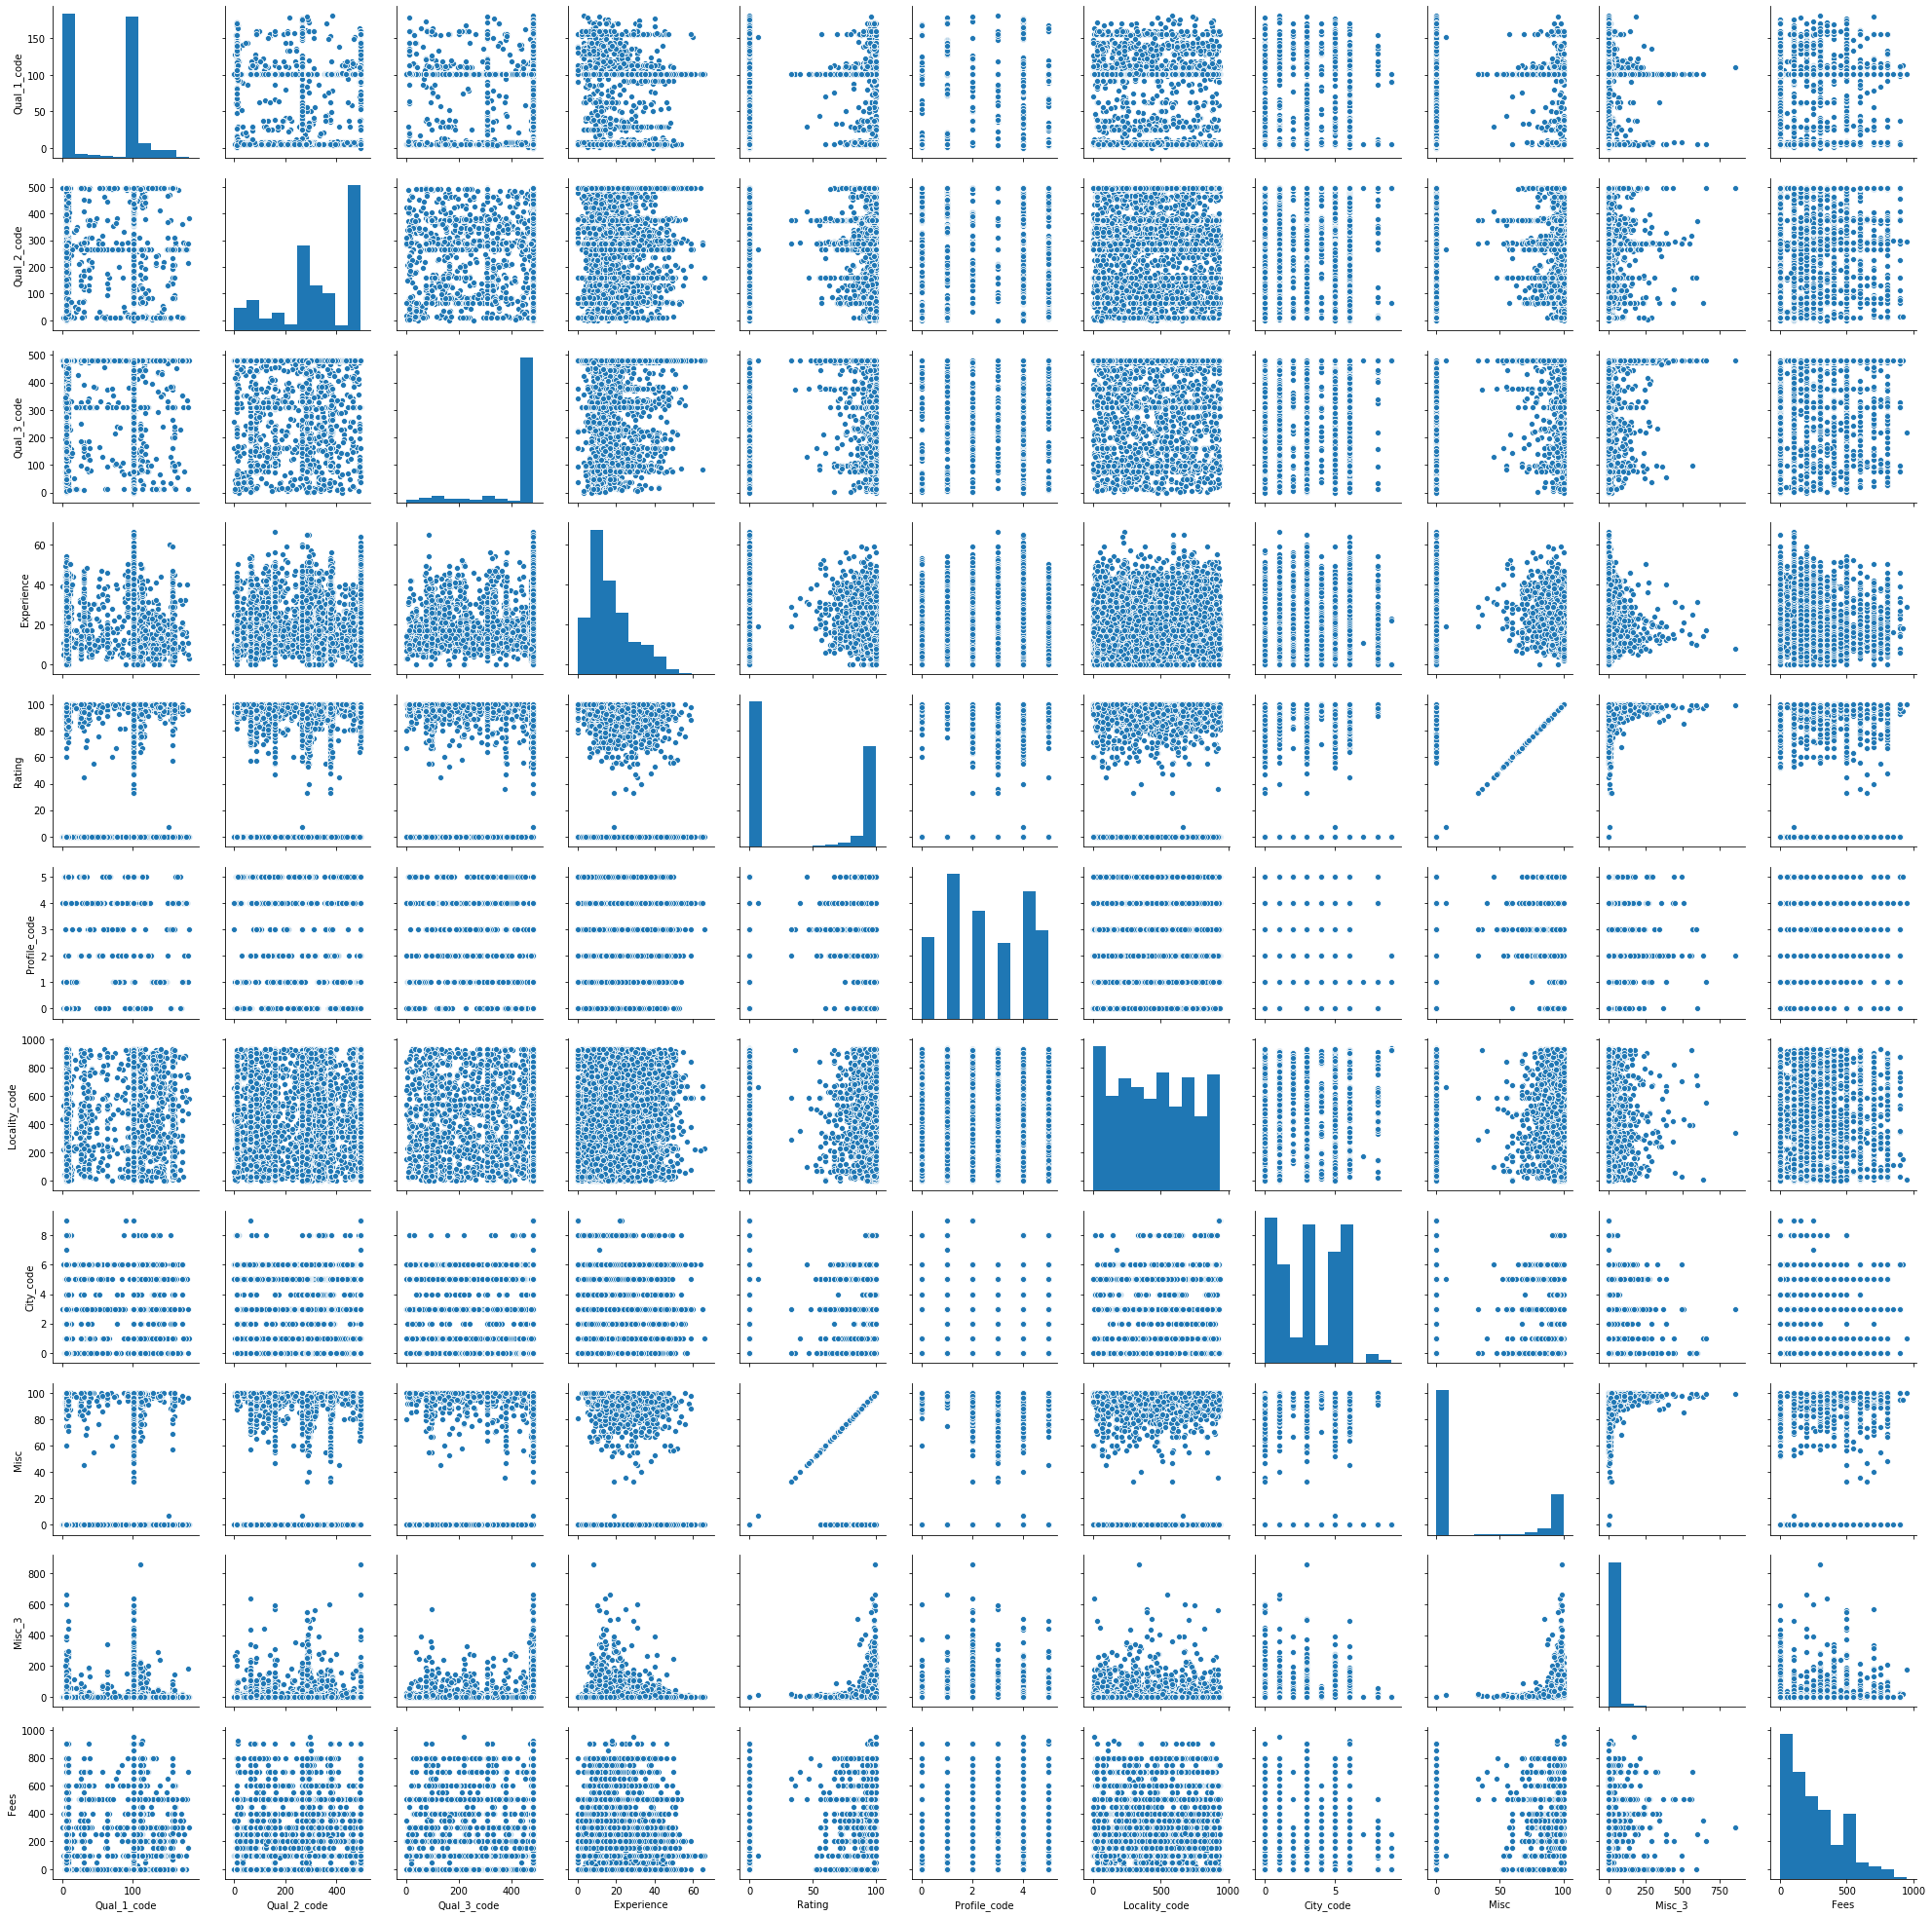

In [28]:
sns.pairplot(dctr)
plt.show()

In [63]:
dctr.corr()

,Qual_1_code,Qual_2_code,Qual_3_code,Experience,Rating,Profile_code,Locality_code,City_code,Misc,Misc_3,Fees
Qual_1_code,1.000000,-0.434076,-0.163986,0.162072,-0.023196,0.306088,0.015517,-0.026650,0.140303,0.143707,0.034651
Qual_2_code,-0.434076,1.000000,0.170266,-0.108121,-0.150786,-0.012076,0.011041,0.049444,-0.131659,-0.133009,-0.024324
Qual_3_code,-0.163986,0.170266,1.000000,-0.078891,-0.106943,-0.054948,0.017006,0.032774,-0.105999,-0.117273,0.003590
Experience,0.162072,-0.108121,-0.078891,1.000000,0.056777,0.158704,-0.013473,-0.019336,0.109807,0.086976,-0.009908
Rating,-0.023196,-0.150786,-0.106943,0.056777,1.000000,-0.130458,-0.044448,-0.089772,0.604185,0.563159,0.040649
Profile_code,0.306088,-0.012076,-0.054948,0.158704,-0.130458,1.000000,0.008674,0.000700,0.073161,0.066305,0.010505
Locality_code,0.015517,0.011041,0.017006,-0.013473,-0.044448,0.008674,1.000000,-0.062780,-0.016045,-0.016904,-0.015506
City_code,-0.026650,0.049444,0.032774,-0.019336,-0.089772,0.000700,-0.062780,1.000000,-0.088824,-0.082636,-0.013512
Misc,0.140303,-0.131659,-0.105999,0.109807,0.604185,0.073161,-0.016045,-0.088824,1.000000,0.925789,0.023315
Misc_3,0.143707,-0.133009,-0.117273,0.086976,0.563159,0.066305,-0.016904,-0.082636,0.925789,1.000000,0.029651


In [64]:
dctr.skew()

Qual_1_code      0.113945
Qual_2_code     -0.680824
Qual_3_code     -2.999218
Experience      -0.931891
Rating           0.394248
Profile_code     0.106272
Locality_code    0.091492
City_code        0.063163
Misc             1.398823
Misc_3           1.847001
Fees            -0.976083
dtype: float64

In [65]:
X = dctr.drop('Fees', axis = 1)
y = dctr['Fees']

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=75)

In [67]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [78]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.tree import DecisionTreeRegressor
depth  =list(range(3,30))
param_grid =dict(max_depth =depth)
tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
tree.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23,

In [79]:
print(tree.best_estimator_)
tree.best_params_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


{'max_depth': 3}

In [83]:
y_train_pred =tree.predict(X_train) 
y_test_pred =tree.predict(X_test)

In [84]:
print("Train Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  2.4096235011115525
R-squared:  0.012347149762743648


In [101]:
print("Test Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  2.48680053510399
R-squared:  0.0016646025054407598


In [102]:
from sklearn.ensemble import RandomForestRegressor
import xgboost
from xgboost import XGBRegressor

from sklearn.preprocessing import LabelEncoder

from sklearn.externals import joblib

In [103]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
random_regressor = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter = 20, scoring = 'neg_mean_absolute_error', cv = 5, n_jobs = -1)
random_regressor.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [104]:
print(random_regressor.best_estimator_)
random_regressor.best_params_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


{'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 4}

In [105]:
y_train_pred = random_regressor.predict(X_train)
y_test_pred = random_regressor.predict(X_test)

In [106]:
print("Train Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  1.7603943834252382
R-squared:  0.47286010045747484


In [107]:
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
model = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_...
                                          validate_parameters=False,
                                          verbosity=None),
                   iid='deprecated', n_iter=20, n_jobs=-1,
   

In [108]:
print(model.best_estimator_)
model.best_params_

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=1,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=400, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=100.0, scale_pos_weight=1, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None)


{'reg_lambda': 100.0,
 'n_estimators': 400,
 'max_depth': 1,
 'learning_rate': 0.1}

In [109]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [110]:
print("Train Results for XGBoost Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for XGBoost Regressor Model:
--------------------------------------------------
Root mean squared error:  2.4013527675270203
R-squared:  0.019115505664328847


In [111]:
print("Test Results for XGBoost Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for XGBoost Regressor Model:
--------------------------------------------------
Root mean squared error:  2.4876760431421285
R-squared:  0.0009615267959507401
